In [1]:
import cv2
import helpers
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
img_dir_training = r'CVND_Exercises-master\1_1_Image_Representation\day_night_images\training'
img_dir_test = r'CVND_Exercises-master\1_1_Image_Representation\day_night_images\test'

In [3]:
IMAGE_LIST = helpers.load_dataset(img_dir_training)

Shape::  (458, 800, 3)
Label::  day


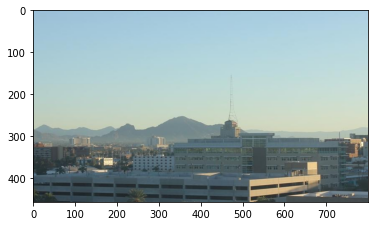

In [10]:
img_index = 0
selected_img = IMAGE_LIST[img_index][0]
selected_label = IMAGE_LIST[img_index][1]

plt.imshow(selected_img)
print('Shape:: ', selected_img.shape)
print('Label:: ', selected_label)

In [11]:
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

Shape:  (600, 1100, 3)
Label [1 = day, 0 = night]:  1


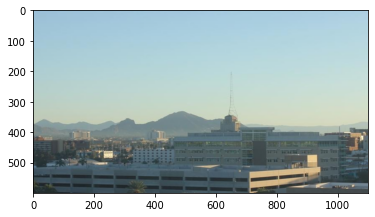

In [16]:
image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print('Shape: ',selected_image.shape)
print('Label [1 = day, 0 = night]: ', selected_label)

Label: 1


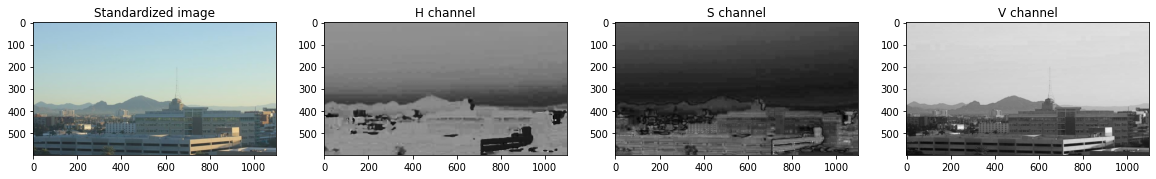

In [17]:
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [21]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv[:,:,2])    
    area = 600*1100.0  # pixels
    avg = sum_brightness/area
    
    return avg

Avg brightness: 35.202807575757575


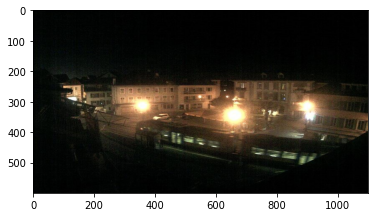

In [23]:
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]
avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

In [24]:
def estimate_label(rgb_image):
    
    # Extract average brightness feature from an RGB image 
    avg = avg_brightness(rgb_image)
        
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    threshold = 120
    if(avg > threshold):
        # if the average brightness is above the threshold value, we classify it as "day"
        predicted_label = 1
    # else, the pred-cted_label can stay 0 (it is predicted to be "night")
    
    return predicted_label

In [26]:

import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(img_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

In [27]:
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels

In [29]:

# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.86875
Number of misclassified images = 21 out of 160


Avg brightness: 175.5829106060606
1


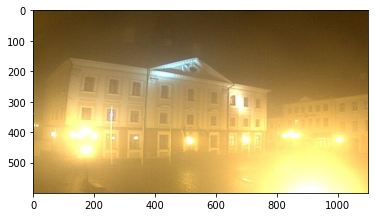

In [31]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as5
num = 0
test_mis_im = MISCLASSIFIED[num][0]
avg = avg_brightness(test_mis_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_mis_im)
print(str(MISCLASSIFIED[num][1]))